# Pair Programming Estadística II

# Cuartiles, estadística con pandas y tabla de frecuencias


In [1]:
import pandas as pd
import numpy as np
import pickle
import os
from scipy import stats 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [2]:
df_train = pd.read_csv("../datos/train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
homogenizar_columnas = {col: col.lower().replace(" ", "_") for col in df_train}
df_train.rename(columns = homogenizar_columnas, inplace = True)

df_train.head(2)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


Los objetivos de hoy son:

1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:

- Tabla de frecuencias

- Variables cualitativas



- Frecuencia acumulada

- Representación de al menos una tabla de frecuencias

- Interpretación de los resultados.

2. Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

- Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo

In [10]:
# media, mediana, moda, minimo

media = df_train['saleprice'].mean()
print(f' La media de la columna "saleprice" es {media}')
print('---------')

mediana = df_train['saleprice'].median()
print(f' La mediana de la columna "saleprice" es {mediana}')
print('---------')

moda = df_train['saleprice'].mode()[0]
print(f' La moda de la columna "saleprice" es {moda}')
print('---------')

max_price = df_train['saleprice'].max()
print(f' El valor máximo de la columna "saleprice" es {max_price}')
print('---------')

min_price = df_train['saleprice'].min()
print(f' El valor mínimo de la columna "saleprice" es {min_price}')

 La media de la columna "saleprice" es 180921.19589041095
---------
 La mediana de la columna "saleprice" es 163000.0
---------
 La moda de la columna "saleprice" es 140000
---------
 El valor máximo de la columna "saleprice" es 755000
---------
 El valor mínimo de la columna "saleprice" es 34900


In [11]:
# con el método describe podemos comprobar los valores 

df_train['saleprice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

- Percentiles 25, 75

In [5]:
percentil25 = np.percentile(df_train["saleprice"], 25)
print("El percentil 25 es:", percentil25)

El percentil 25 es: 129975.0


In [6]:
percentil75 = np.percentile(df_train["saleprice"], 75)
print("El percentil 75 es:", percentil75)

El percentil 75 es: 214000.0


- Con el método describe

In [7]:
df_train['saleprice'].describe().reset_index()

,index,saleprice
0,count,1460.000000
1,mean,180921.195890
2,std,79442.502883
3,min,34900.000000
4,25%,129975.000000
5,50%,163000.000000
6,75%,214000.000000
7,max,755000.000000


- Rango Intercualtílico

In [8]:
# Calculamos los percentiles 75 y 25 (que serían el tercer y primer cuartil)

q3, q1 = np.percentile(df_train["saleprice"], [75, 25])

# Calculamos el rango intercuartílico como la resta de los valores del tercer y primer cuartil
IQR = q3 - q1
print("El rango intercuartílico es:", IQR)

El rango intercuartílico es: 84025.0


- Boxplot de algunas variables

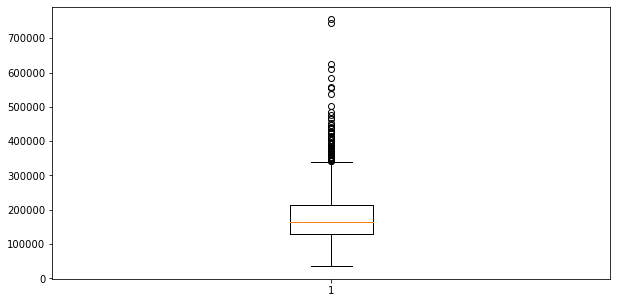

In [9]:
# Establecemos el tamaño de la gráfica
fig = plt.figure(figsize = (10,5))

# creamos el boxplot
plt.boxplot(df_train["saleprice"]);

In [10]:
print(df_train['saleprice'].max())
print(df_train['saleprice'].min())

755000
34900


In [11]:
df_train['saleprice'].unique()

array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,
       129900, 118000, 129500, 345000, 144000, 279500, 157000, 132000,
       149000,  90000, 159000, 139000, 325300, 139400, 230000, 154000,
       256300, 134800, 306000, 207500,  68500,  40000, 149350, 179900,
       165500, 277500, 309000, 145000, 153000, 109000,  82000, 160000,
       170000, 130250, 141000, 319900, 239686, 249700, 113000, 127000,
       177000, 114500, 110000, 385000, 130000, 180500, 172500, 196500,
       438780, 124900, 158000, 101000, 202500, 219500, 317000, 180000,
       226000,  80000, 225000, 244000, 185000, 144900, 107400,  91000,
       135750, 136500, 193500, 153500, 245000, 126500, 168500, 260000,
       174000, 164500,  85000, 123600, 109900,  98600, 163500, 133900,
       204750, 214000,  94750,  83000, 128950, 205000, 178000, 118964,
       198900, 169500, 100000, 115000, 190000, 136900, 383970, 217000,
       259500, 176000, 155000, 320000, 163990, 136000, 153900, 181000,
      

In [12]:
# 

df_train['bins'] = pd.cut(x=df_train['saleprice'], bins=[0, 200000, 500000, 800000])

- Variables cuantitativas

In [13]:
df_train = df_train.groupby("saleprice").count().reset_index().sort_values(by = "mssubclass", ascending = False)
df_train.head()

,saleprice,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,bins
194,140000,20,20,20,18,20,20,2,20,20,...,20,0,4,1,20,20,20,20,20,20
171,135000,17,17,17,15,17,17,2,17,17,...,17,0,4,0,17,17,17,17,17,17
212,145000,14,14,14,12,14,14,1,14,14,...,14,0,2,0,14,14,14,14,14,14
248,155000,14,14,14,14,14,14,1,14,14,...,14,0,4,0,14,14,14,14,14,14
368,190000,13,13,13,7,13,13,0,13,13,...,13,0,3,1,13,13,13,13,13,13
